In [54]:
import glob
import pandas as pd

train_files = sorted(glob.glob("../processed/2023/*.parquet"))
test_files  = sorted(glob.glob("../processed/2024/*.parquet"))

print("Train months:", len(train_files))
print("Test months:", len(test_files))
print("First train file:", train_files[0])


Train months: 12
Test months: 12
First train file: ../processed/2023/2023_01.parquet


In [55]:
df = pd.read_parquet(train_files[0])
print(df.shape)
df.head()

(527197, 26)


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginCityMarketID,...,CRSDepTime,DepTimeBlk,CRSArrTime,ArrTimeBlk,Distance,DistanceGroup,CRSElapsedTime,Cancelled,Diverted,ArrDel15
0,2023,1,2,1,2023-01-02,9E,20363,4628,10529,30529,...,0800,0800-0859,0905,0900-0959,101.0,1,65.0,0.0,0.0,0.0
1,2023,1,3,2,2023-01-03,9E,20363,4628,10529,30529,...,0800,0800-0859,0905,0900-0959,101.0,1,65.0,0.0,0.0,0.0
2,2023,1,4,3,2023-01-04,9E,20363,4628,10529,30529,...,0800,0800-0859,0905,0900-0959,101.0,1,65.0,0.0,0.0,0.0
3,2023,1,5,4,2023-01-05,9E,20363,4628,10529,30529,...,0800,0800-0859,0905,0900-0959,101.0,1,65.0,0.0,0.0,0.0
4,2023,1,6,5,2023-01-06,9E,20363,4628,10529,30529,...,0800,0800-0859,0905,0900-0959,101.0,1,65.0,0.0,0.0,0.0


In [56]:
df[["Cancelled", "Diverted", "ArrDel15"]].value_counts().head(10)


Cancelled  Diverted  ArrDel15
0.0        0.0       0.0         410484
                     1.0         116713
Name: count, dtype: int64

In [57]:
#check for missing values
(df.isna().mean().sort_values(ascending=False).head(15))


Year                0.0
Month               0.0
Diverted            0.0
Cancelled           0.0
CRSElapsedTime      0.0
DistanceGroup       0.0
Distance            0.0
ArrTimeBlk          0.0
CRSArrTime          0.0
DepTimeBlk          0.0
CRSDepTime          0.0
Dest                0.0
DestState           0.0
DestCityMarketID    0.0
DestAirportID       0.0
dtype: float64

In [58]:
import glob
import pandas as pd

files_2023 = sorted(glob.glob("../processed/2023/*.parquet"))
files_2024 = sorted(glob.glob("../processed/2024/*.parquet"))

all_files = files_2023 + files_2024

print("2023 files:", len(files_2023))
print("2024 files:", len(files_2024))
print("Total files:", len(all_files))
print("Example file:", all_files[0])


2023 files: 12
2024 files: 12
Total files: 24
Example file: ../processed/2023/2023_01.parquet


In [59]:
def load_all_parquet(files):
    dfs = []
    total_rows = 0
    for f in files:
        d = pd.read_parquet(f)
        dfs.append(d)
        total_rows += len(d)
        print(f"Loaded {f.split('/')[-1]} rows={len(d):,} | running_total={total_rows:,}")
    return pd.concat(dfs, ignore_index=True)

df_all = load_all_parquet(all_files)
df_all.shape


Loaded 2023_01.parquet rows=527,197 | running_total=527,197
Loaded 2023_02.parquet rows=492,747 | running_total=1,019,944
Loaded 2023_03.parquet rows=571,533 | running_total=1,591,477
Loaded 2023_04.parquet rows=550,249 | running_total=2,141,726
Loaded 2023_05.parquet rows=575,429 | running_total=2,717,155
Loaded 2023_06.parquet rows=562,804 | running_total=3,279,959
Loaded 2023_07.parquet rows=585,058 | running_total=3,865,017
Loaded 2023_08.parquet rows=592,142 | running_total=4,457,159
Loaded 2023_09.parquet rows=560,887 | running_total=5,018,046
Loaded 2023_10.parquet rows=596,003 | running_total=5,614,049
Loaded 2023_11.parquet rows=562,413 | running_total=6,176,462
Loaded 2023_12.parquet rows=566,941 | running_total=6,743,403
Loaded 2024_01.parquet rows=525,370 | running_total=7,268,773
Loaded 2024_02.parquet rows=515,269 | running_total=7,784,042
Loaded 2024_03.parquet rows=585,413 | running_total=8,369,455
Loaded 2024_04.parquet rows=576,915 | running_total=8,946,370
Loaded 202

(13708650, 26)

In [60]:
print("Rows, Cols:", df_all.shape)
df_all.dtypes


Rows, Cols: (13708650, 26)


Year                                 int64
Month                                int64
DayofMonth                           int64
DayOfWeek                            int64
FlightDate                          object
Reporting_Airline                      str
DOT_ID_Reporting_Airline             int64
Flight_Number_Reporting_Airline    float64
OriginAirportID                      int64
OriginCityMarketID                   int64
OriginState                            str
Origin                                 str
DestAirportID                        int64
DestCityMarketID                     int64
DestState                              str
Dest                                   str
CRSDepTime                             str
DepTimeBlk                             str
CRSArrTime                             str
ArrTimeBlk                             str
Distance                           float64
DistanceGroup                        int64
CRSElapsedTime                     float64
Cancelled  

In [61]:
delay_rate = df_all["ArrDel15"].mean()
print("Delay rate (ArrDel15=1):", delay_rate)
df_all["ArrDel15"].value_counts(normalize=True)

Delay rate (ArrDel15=1): 0.20692518957008896


ArrDel15
0.0    0.793075
1.0    0.206925
Name: proportion, dtype: float64

In [62]:
delay_by_month = (
    df_all.groupby(["Year","Month"])["ArrDel15"]
    .mean()
    .reset_index()
    .sort_values(["Year","Month"])
)
delay_by_month.tail(24)


,Year,Month,ArrDel15
0,2023,1,0.221384
1,2023,2,0.188675
2,2023,3,0.238033
3,2023,4,0.228773
4,2023,5,0.180942
5,2023,6,0.270552
6,2023,7,0.285579
7,2023,8,0.216906
8,2023,9,0.186667
9,2023,10,0.156014


In [63]:
origin_stats = (
    df_all.groupby("Origin")["ArrDel15"]
    .agg(delay_rate="mean", flights="count")
    .reset_index()
)

origin_stats = origin_stats[origin_stats["flights"] >= 5000]
origin_stats.sort_values("delay_rate", ascending=False).head(15)


,Origin,delay_rate,flights
20,ASE,0.300547,13349
122,FLL,0.289631,178054
47,BQN,0.287326,5231
219,MIA,0.275491,208911
207,MCO,0.265847,318104
312,SJU,0.265162,66876
92,DFW,0.256159,586893
56,BWI,0.250995,192283
70,CLT,0.250023,406947
325,STT,0.248697,9980


In [64]:
df_all["route"] = df_all["Origin"] + "->" + df_all["Dest"]

route_stats = (
    df_all.groupby("route")["ArrDel15"]
    .agg(delay_rate="mean", flights="count")
    .reset_index()
)

route_stats = route_stats[route_stats["flights"] >= 2000]
route_stats.sort_values("delay_rate", ascending=False).head(15)


,route,delay_rate,flights
6413,SJU->PHL,0.373715,2724
1294,CLT->SFO,0.366517,3124
5216,PHL->SJU,0.356439,2741
2498,FLL->PIT,0.352689,2101
2501,FLL->RDU,0.351793,2817
4245,MIA->SFO,0.350696,2803
1961,DFW->MSN,0.350456,2083
2002,DFW->SFO,0.349549,7873
1974,DFW->PBI,0.349266,2113
2435,FLL->AUS,0.346399,2194


In [65]:
timeblk_stats = (
    df_all.groupby("DepTimeBlk")["ArrDel15"]
    .agg(delay_rate="mean", flights="count")
    .reset_index()
)

timeblk_stats.sort_values("delay_rate", ascending=False).head(20)


,DepTimeBlk,delay_rate,flights
15,2000-2059,0.301233,616897
14,1900-1959,0.295160,746083
13,1800-1859,0.287735,837181
16,2100-2159,0.282512,466175
12,1700-1759,0.275639,846142
17,2200-2259,0.274529,340102
11,1600-1659,0.266989,784111
10,1500-1559,0.247461,786957
9,1400-1459,0.232176,781182
18,2300-2359,0.225016,119405


In [66]:
import matplotlib.pyplot as plt
import pandas as pd

df_all["FlightDate"] = pd.to_datetime(df_all["FlightDate"])


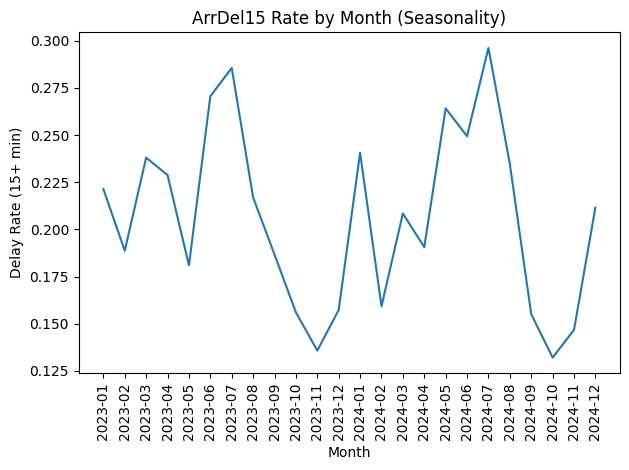

In [67]:
delay_by_month = (
    df_all.groupby(["Year","Month"])["ArrDel15"]
    .mean()
    .reset_index()
    .sort_values(["Year","Month"])
)

x = delay_by_month["Year"].astype(str) + "-" + delay_by_month["Month"].astype(str).str.zfill(2)

plt.figure()
plt.plot(x, delay_by_month["ArrDel15"])
plt.xticks(rotation=90)
plt.title("ArrDel15 Rate by Month (Seasonality)")
plt.ylabel("Delay Rate (15+ min)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()


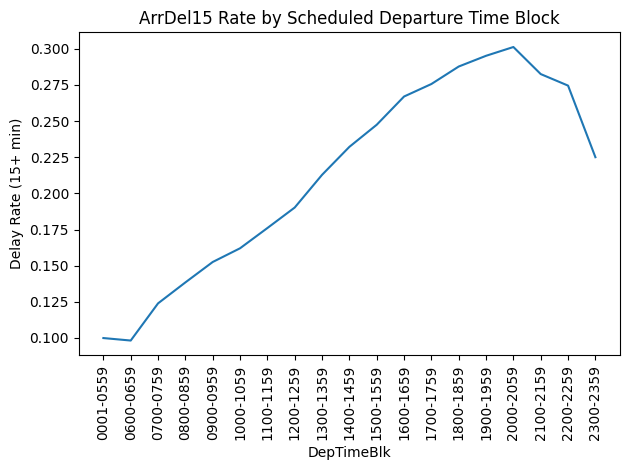

In [68]:
timeblk = (
    df_all.groupby("DepTimeBlk")["ArrDel15"]
    .mean()
    .reset_index()
)

timeblk["start"] = timeblk["DepTimeBlk"].str.slice(0,4).astype(int)
timeblk = timeblk.sort_values("start")

plt.figure()
plt.plot(timeblk["DepTimeBlk"], timeblk["ArrDel15"])
plt.xticks(rotation=90)
plt.title("ArrDel15 Rate by Scheduled Departure Time Block")
plt.ylabel("Delay Rate (15+ min)")
plt.xlabel("DepTimeBlk")
plt.tight_layout()
plt.show()


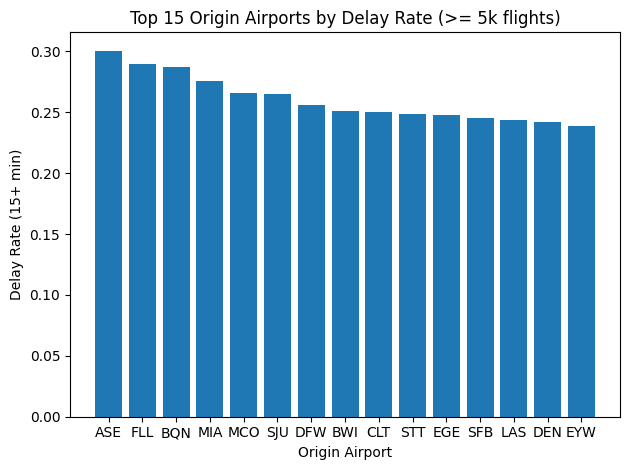

In [69]:
origin_stats = (
    df_all.groupby("Origin")["ArrDel15"]
    .agg(delay_rate="mean", flights="count")
    .reset_index()
)

origin_stats = origin_stats[origin_stats["flights"] >= 5000]
top15 = origin_stats.sort_values("delay_rate", ascending=False).head(15)

plt.figure()
plt.bar(top15["Origin"], top15["delay_rate"])
plt.title("Top 15 Origin Airports by Delay Rate (>= 5k flights)")
plt.ylabel("Delay Rate (15+ min)")
plt.xlabel("Origin Airport")
plt.tight_layout()
plt.show()


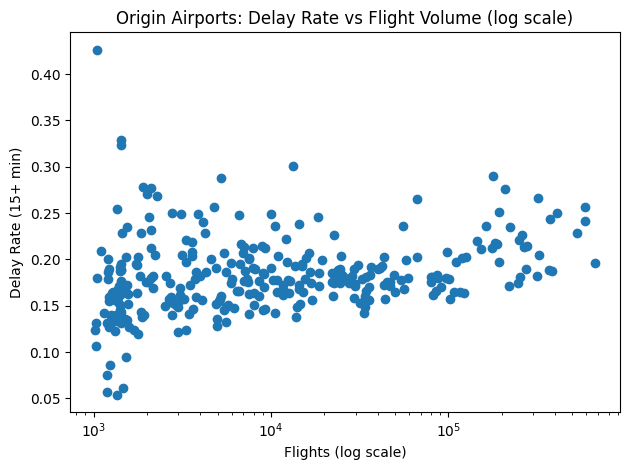

In [70]:
origin_stats = (
    df_all.groupby("Origin")["ArrDel15"]
    .agg(delay_rate="mean", flights="count")
    .reset_index()
)
plot_df = origin_stats[origin_stats["flights"] >= 1000]

plt.figure()
plt.scatter(plot_df["flights"], plot_df["delay_rate"])
plt.xscale("log")
plt.title("Origin Airports: Delay Rate vs Flight Volume (log scale)")
plt.xlabel("Flights (log scale)")
plt.ylabel("Delay Rate (15+ min)")
plt.tight_layout()
plt.show()


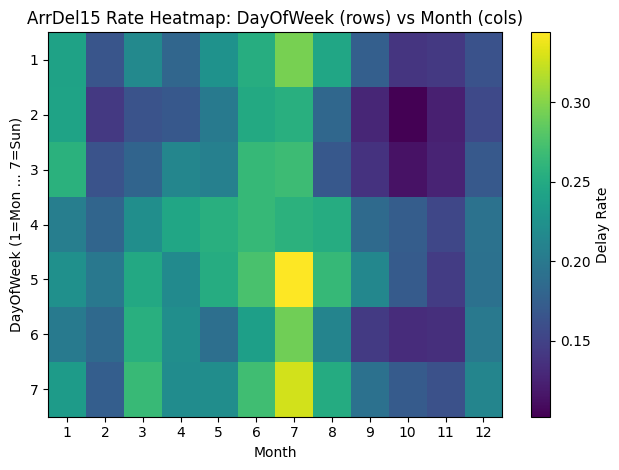

In [71]:
pivot = (
    df_all.pivot_table(
        index="DayOfWeek",
        columns="Month",
        values="ArrDel15",
        aggfunc="mean"
    )
)

plt.figure()
plt.imshow(pivot, aspect="auto")
plt.title("ArrDel15 Rate Heatmap: DayOfWeek (rows) vs Month (cols)")
plt.xlabel("Month")
plt.ylabel("DayOfWeek (1=Mon ... 7=Sun)")
plt.colorbar(label="Delay Rate")
plt.xticks(range(12), range(1,13))
plt.yticks(range(7), range(1,8))
plt.tight_layout()
plt.show()


In [72]:
cols = ["Year","Month","DayOfWeek","FlightDate",
        "Reporting_Airline","Origin","Dest",
        "CRSDepTime","CRSArrTime","DepTimeBlk","ArrTimeBlk",
        "Distance","CRSElapsedTime","ArrDel15"]

(df_all[cols].isna().mean().sort_values(ascending=False).head(20))


Year                 0.0
Month                0.0
DayOfWeek            0.0
FlightDate           0.0
Reporting_Airline    0.0
Origin               0.0
Dest                 0.0
CRSDepTime           0.0
CRSArrTime           0.0
DepTimeBlk           0.0
ArrTimeBlk           0.0
Distance             0.0
CRSElapsedTime       0.0
ArrDel15             0.0
dtype: float64

In [73]:
def is_valid_hhmm(x):
    try:
        x = int(x)
        hh, mm = x // 100, x % 100
        return 0 <= hh <= 23 and 0 <= mm <= 59
    except:
        return False

valid_rate = df_all["CRSDepTime"].apply(is_valid_hhmm).mean()
print("Valid CRSDepTime rate:", valid_rate)


Valid CRSDepTime rate: 0.9999999270533568


In [74]:
import numpy as np

def hhmm_to_hour_min(x):
    x = int(x)
    return x // 100, x % 100

df_all["dep_hour"], df_all["dep_min"] = zip(*df_all["CRSDepTime"].map(hhmm_to_hour_min))
df_all["arr_hour"], df_all["arr_min"] = zip(*df_all["CRSArrTime"].map(hhmm_to_hour_min))

df_all["is_weekend"] = df_all["DayOfWeek"].isin([6,7]).astype(int)

df_all[["CRSDepTime","dep_hour","dep_min","CRSArrTime","arr_hour","arr_min","is_weekend"]].head()


,CRSDepTime,dep_hour,dep_min,CRSArrTime,arr_hour,arr_min,is_weekend
0,0800,8,0,0905,9,5,0
1,0800,8,0,0905,9,5,0
2,0800,8,0,0905,9,5,0
3,0800,8,0,0905,9,5,0
4,0800,8,0,0905,9,5,0


In [75]:
df_all["FlightDate"] = pd.to_datetime(df_all["FlightDate"])
df_all = df_all.sort_values("FlightDate").reset_index(drop=True)


In [76]:
df_all["route"] = df_all["Origin"] + "->" + df_all["Dest"]


In [77]:

def rolling_rate(series, window, min_periods):
    return series.shift(1).rolling(window=window, min_periods=min_periods).mean()

def rolling_count(series, window, min_periods):
    return series.shift(1).rolling(window=window, min_periods=min_periods).count()

# 1) Origin recent delay rate (last 200 flights at that origin)
df_all["origin_delay_rate_200"] = (
    df_all.groupby("Origin")["ArrDel15"]
    .apply(lambda s: rolling_rate(s, window=200, min_periods=50))
    .reset_index(level=0, drop=True)
)
df_all["origin_delay_count_200"] = (
    df_all.groupby("Origin")["ArrDel15"]
    .apply(lambda s: rolling_count(s, window=200, min_periods=50))
    .reset_index(level=0, drop=True)
)



In [78]:
# 2) Route recent delay rate (last 200 flights on that route)
df_all["route_delay_rate_200"] = (
    df_all.groupby("route")["ArrDel15"]
    .apply(lambda s: rolling_rate(s, window=200, min_periods=50))
    .reset_index(level=0, drop=True)
)
df_all["route_delay_count_200"] = (
    df_all.groupby("route")["ArrDel15"]
    .apply(lambda s: rolling_count(s, window=200, min_periods=50))
    .reset_index(level=0, drop=True)
)



In [79]:
# 3) Carrier recent delay rate (last 500 flights for that airline)
df_all["carrier_delay_rate_500"] = (
    df_all.groupby("Reporting_Airline")["ArrDel15"]
    .apply(lambda s: rolling_rate(s, window=500, min_periods=100))
    .reset_index(level=0, drop=True)
)



In [80]:
# 4) Departure time-block recent delay rate (last 500 flights in that time block)
df_all["depblk_delay_rate_500"] = (
    df_all.groupby("DepTimeBlk")["ArrDel15"]
    .apply(lambda s: rolling_rate(s, window=500, min_periods=100))
    .reset_index(level=0, drop=True)
)

df_all[["FlightDate","Origin","route","Reporting_Airline","DepTimeBlk",
        "ArrDel15","origin_delay_rate_200","route_delay_rate_200",
        "carrier_delay_rate_500","depblk_delay_rate_500"]].head(20)


,FlightDate,Origin,route,Reporting_Airline,DepTimeBlk,ArrDel15,origin_delay_rate_200,route_delay_rate_200,carrier_delay_rate_500,depblk_delay_rate_500
0,2023-01-01,IAH,IAH->LAS,UA,2000-2059,1.0,NaN,NaN,NaN,NaN
1,2023-01-01,BOS,BOS->MIA,F9,1100-1159,0.0,NaN,NaN,NaN,NaN
2,2023-01-01,MCO,MCO->CLT,F9,1900-1959,1.0,NaN,NaN,NaN,NaN
3,2023-01-01,CLT,CLT->MCO,F9,2200-2259,1.0,NaN,NaN,NaN,NaN
4,2023-01-01,MCO,MCO->PHL,F9,2200-2259,1.0,NaN,NaN,NaN,NaN
5,2023-01-01,LAS,LAS->SFO,F9,0600-0659,0.0,NaN,NaN,NaN,NaN
6,2023-01-01,SFO,SFO->LAS,F9,0800-0859,0.0,NaN,NaN,NaN,NaN
7,2023-01-01,LAS,LAS->BNA,F9,1100-1159,1.0,NaN,NaN,NaN,NaN
8,2023-01-01,BNA,BNA->LAS,F9,1700-1759,1.0,NaN,NaN,NaN,NaN
9,2023-01-01,LAS,LAS->SMF,F9,2000-2059,1.0,NaN,NaN,NaN,NaN


In [81]:
df_all[["origin_delay_rate_200","route_delay_rate_200","carrier_delay_rate_500","depblk_delay_rate_500"]].isna().mean()


origin_delay_rate_200     0.001286
route_delay_rate_200      0.023974
carrier_delay_rate_500    0.000109
depblk_delay_rate_500     0.000139
dtype: float64

In [82]:
global_delay_rate = df_all["ArrDel15"].mean()

fill_cols = [
    "origin_delay_rate_200",
    "route_delay_rate_200",
    "carrier_delay_rate_500",
    "depblk_delay_rate_500"
]

df_all[fill_cols] = df_all[fill_cols].fillna(global_delay_rate)

df_all[fill_cols].isna().sum(), global_delay_rate


(origin_delay_rate_200     0
 route_delay_rate_200      0
 carrier_delay_rate_500    0
 depblk_delay_rate_500     0
 dtype: int64,
 np.float64(0.20692518957008896))

In [83]:
train_df = df_all[df_all["Year"] == 2023].copy()
val_df   = df_all[(df_all["Year"] == 2024) & (df_all["Month"].between(1, 6))].copy()
test_df  = df_all[(df_all["Year"] == 2024) & (df_all["Month"].between(7, 12))].copy()

train_df.shape, val_df.shape, test_df.shape


((6743403, 38), (3403465, 38), (3561782, 38))

In [84]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score



In [85]:
# Fill NaNs in rolling features
global_rate = df_all["ArrDel15"].mean()
roll_cols = ["origin_delay_rate_200","route_delay_rate_200","carrier_delay_rate_500","depblk_delay_rate_500"]
for c in roll_cols:
    if c in df_all.columns:
        df_all[c] = df_all[c].fillna(global_rate)


In [86]:
# Encode categories as integer codes (NO one-hot)
cat_cols = ["Reporting_Airline","Origin","Dest","DepTimeBlk","ArrTimeBlk"]
for c in cat_cols:
    df_all[c] = df_all[c].astype("category").cat.codes.astype("int32")

num_cols = ["Month","DayofMonth","DayOfWeek","Distance","CRSElapsedTime","dep_hour","dep_min","arr_hour","arr_min","is_weekend"] \
           + [c for c in roll_cols if c in df_all.columns]

FEATURES = num_cols + cat_cols
TARGET = "ArrDel15"

In [87]:
# Time split
train_df = df_all[df_all["Year"] == 2023]
val_df   = df_all[(df_all["Year"] == 2024) & (df_all["Month"].between(1, 6))]
test_df  = df_all[(df_all["Year"] == 2024) & (df_all["Month"].between(7, 12))]

X_train, y_train = train_df[FEATURES], train_df[TARGET].astype(int)
X_val, y_val     = val_df[FEATURES], val_df[TARGET].astype(int)
X_test, y_test   = test_df[FEATURES], test_df[TARGET].astype(int)



In [88]:
# Class imbalance handling
pos_rate = y_train.mean()
scale_pos_weight = (1 - pos_rate) / pos_rate

model = lgb.LGBMClassifier(
    n_estimators=4000,
    learning_rate=0.03,
    num_leaves=128,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    scale_pos_weight=scale_pos_weight
)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="auc",
    callbacks=[lgb.early_stopping(stopping_rounds=100)]
)

val_pred = model.predict_proba(X_val)[:, 1]
test_pred = model.predict_proba(X_test)[:, 1]

print("VAL AUC:", roc_auc_score(y_val, val_pred))
print("TEST AUC:", roc_auc_score(y_test, test_pred))


[LightGBM] [Info] Number of positive: 1386699, number of negative: 5356704
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2125
[LightGBM] [Info] Number of data points in the train set: 6743403, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205638 -> initscore=-1.351423
[LightGBM] [Info] Start training from score -1.351423
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.719746	valid_0's binary_logloss: 0.50976
VAL AUC: 0.7197457945035174
TEST AUC: 0.7239189698237323


In [89]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

thr = 0.5
test_hat = (test_pred >= thr).astype(int)

print("Threshold:", thr)
print(confusion_matrix(y_test, test_hat))
print(classification_report(y_test, test_hat, digits=3))


Threshold: 0.5
[[2860463       0]
 [ 701319       0]]


/Users/pratibhagiri/Desktop/Projects/flight-delay-prediction/.venv/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/pratibhagiri/Desktop/Projects/flight-delay-prediction/.venv/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


              precision    recall  f1-score   support

           0      0.803     1.000     0.891   2860463
           1      0.000     0.000     0.000    701319

    accuracy                          0.803   3561782
   macro avg      0.402     0.500     0.445   3561782
weighted avg      0.645     0.803     0.715   3561782



/Users/pratibhagiri/Desktop/Projects/flight-delay-prediction/.venv/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [90]:
import numpy as np
from sklearn.metrics import f1_score

thresholds = np.linspace(0.05, 0.95, 19)
scores = []

for t in thresholds:
    preds = (test_pred >= t).astype(int)
    scores.append((t, f1_score(y_test, preds)))

best_t, best_f1 = max(scores, key=lambda x: x[1])
print("Best threshold for F1:", best_t, "Best F1:", best_f1)


Best threshold for F1: 0.3 Best F1: 0.42786737904541056


In [91]:
best_thr = best_t
test_hat = (test_pred >= best_thr).astype(int)

print("Threshold:", best_thr)
print(confusion_matrix(y_test, test_hat))
print(classification_report(y_test, test_hat, digits=3))


Threshold: 0.3
[[2458049  402414]
 [ 400930  300389]]
              precision    recall  f1-score   support

           0      0.860     0.859     0.860   2860463
           1      0.427     0.428     0.428    701319

    accuracy                          0.774   3561782
   macro avg      0.644     0.644     0.644   3561782
weighted avg      0.775     0.774     0.775   3561782



In [92]:
import pandas as pd
import numpy as np

tmp = pd.DataFrame({"y": y_test.values, "p": test_pred})
tmp = tmp.sort_values("p", ascending=False).reset_index(drop=True)

total_pos = tmp["y"].sum()
for pct in [0.01, 0.05, 0.10, 0.20]:
    k = int(len(tmp) * pct)
    captured = tmp.iloc[:k]["y"].sum()
    print(f"Top {int(pct*100)}% flagged captures {captured/total_pos:.3f} of all delays")


Top 1% flagged captures 0.037 of all delays
Top 5% flagged captures 0.156 of all delays
Top 10% flagged captures 0.268 of all delays
Top 20% flagged captures 0.432 of all delays


In [93]:
imp = pd.DataFrame({
    "feature": FEATURES,
    "importance": model.feature_importances_
}).sort_values("importance", ascending=False)

imp.head(20)


,feature,importance
11,route_delay_rate_200,228
12,carrier_delay_rate_500,223
10,origin_delay_rate_200,196
7,arr_hour,134
14,Reporting_Airline,112
5,dep_hour,103
17,DepTimeBlk,38
13,depblk_delay_rate_500,36
0,Month,25
3,Distance,21


In [94]:
model2 = lgb.LGBMClassifier(
    n_estimators=8000,
    learning_rate=0.02,
    num_leaves=256,
    min_child_samples=100,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=2.0,
    random_state=42,
    scale_pos_weight=scale_pos_weight
)

model2.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="auc",
    callbacks=[lgb.early_stopping(stopping_rounds=200)]
)

val_pred2 = model2.predict_proba(X_val)[:, 1]
test_pred2 = model2.predict_proba(X_test)[:, 1]

print("VAL AUC:", roc_auc_score(y_val, val_pred2))
print("TEST AUC:", roc_auc_score(y_test, test_pred2))


[LightGBM] [Info] Number of positive: 1386699, number of negative: 5356704
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2125
[LightGBM] [Info] Number of data points in the train set: 6743403, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205638 -> initscore=-1.351423
[LightGBM] [Info] Start training from score -1.351423
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.721615	valid_0's binary_logloss: 0.5091
VAL AUC: 0.7216147377069511
TEST AUC: 0.7257245340536591


In [95]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

os.makedirs("outputs", exist_ok=True)

best_model = model
best_val_pred = val_pred
best_test_pred = test_pred

# 1) Summary metrics CSV
metrics = []
metrics.append(["val_auc",  roc_auc_score(y_val, best_val_pred)])
metrics.append(["test_auc", roc_auc_score(y_test, best_test_pred)])
metrics.append(["val_avg_precision",  average_precision_score(y_val, best_val_pred)])
metrics.append(["test_avg_precision", average_precision_score(y_test, best_test_pred)])

metrics_df = pd.DataFrame(metrics, columns=["metric", "value"])
metrics_df.to_csv("outputs/model_metrics_summary.csv", index=False)

# 2) ROC curve points (for plotting later)
fpr, tpr, roc_thr = roc_curve(y_test, best_test_pred)
roc_df = pd.DataFrame({"fpr": fpr, "tpr": tpr, "threshold": roc_thr})
roc_df.to_csv("outputs/test_roc_curve_points.csv", index=False)

# 3) Precision-Recall curve points
prec, rec, pr_thr = precision_recall_curve(y_test, best_test_pred)
pr_df = pd.DataFrame({
    "precision": prec,
    "recall": rec,
    "threshold": np.append(pr_thr, np.nan)  # align lengths
})
pr_df.to_csv("outputs/test_pr_curve_points.csv", index=False)

# 4) Top-K capture table (recruiter-friendly)
tmp = pd.DataFrame({"y": y_test.values, "p": best_test_pred}).sort_values("p", ascending=False).reset_index(drop=True)
total_delays = tmp["y"].sum()

rows = []
for pct in [0.01, 0.05, 0.10, 0.20, 0.30]:
    k = int(len(tmp) * pct)
    captured = tmp.iloc[:k]["y"].sum()
    rows.append([pct, k, float(captured), float(captured / total_delays)])

topk_df = pd.DataFrame(rows, columns=["top_pct_flagged", "num_flights_flagged", "delays_captured", "capture_rate"])
topk_df.to_csv("outputs/test_topk_delay_capture.csv", index=False)

# 5) Feature importance CSV
imp = pd.DataFrame({
    "feature": FEATURES,
    "importance": best_model.feature_importances_
}).sort_values("importance", ascending=False)

imp.to_csv("outputs/feature_importance.csv", index=False)

print("Saved:")
print(" - outputs/model_metrics_summary.csv")
print(" - outputs/test_roc_curve_points.csv")
print(" - outputs/test_pr_curve_points.csv")
print(" - outputs/test_topk_delay_capture.csv")
print(" - outputs/feature_importance.csv")


Saved:
 - outputs/model_metrics_summary.csv
 - outputs/test_roc_curve_points.csv
 - outputs/test_pr_curve_points.csv
 - outputs/test_topk_delay_capture.csv
 - outputs/feature_importance.csv


In [96]:
import pandas as pd
import os

os.makedirs("outputs", exist_ok=True)

best_test_pred = best_test_pred

pred_df = test_df[["FlightDate","Year","Month","Reporting_Airline","Origin","Dest","DepTimeBlk","ArrTimeBlk","Distance","CRSElapsedTime","ArrDel15"]].copy()
pred_df["pred_delay_prob"] = best_test_pred

# 1) Full predictions (Parquet = small-ish vs CSV)
pred_df.to_parquet("outputs/test_predictions_full.parquet", index=False)

# 2) GitHub-safe sample (CSV)
pred_sample = pred_df.sample(n=min(100_000, len(pred_df)), random_state=42)
pred_sample.to_csv("outputs/test_predictions_sample_100k.csv", index=False)

print("Saved:")
print(" - outputs/test_predictions_full.parquet  (DO NOT push to GitHub)")
print(" - outputs/test_predictions_sample_100k.csv (OK to push)")
print("Rows in full test predictions:", len(pred_df))


Saved:
 - outputs/test_predictions_full.parquet  (DO NOT push to GitHub)
 - outputs/test_predictions_sample_100k.csv (OK to push)
Rows in full test predictions: 3561782
